# C Tutorial
**Author**: Rami Nasser (raminass@gmail.com)

This notebook, reviews important topics in C with examples.


# Compiling
*   Computers only understand binary, which is also used to 
represent instructions like printing something to the screen. Our source code has been written in characters we can read, but it needs to be compiled: converted to machine code, patterns of zeros and ones that our computer can directly understand.


*   A program called a **compiler** will take source code as input and produce machine code as output. This program is **gcc**.
*   To run our program, we’ll type in another command, ./hello, which looks in the current folder '.' for a program called hello, and runs it.



```c
#include <stdio.h>

int main(void)
{
    printf("hello, world");
}
```


```shell
gcc hello.c
```
This will give executable file called a.out.
We can change the name of the exec file, usin -o option:


```shell
gcc hello.c -o hello_world
```

In order to view the assembly code in human readable way:


```shell
gcc –S hello.c
```
This will give a file with type *.s that is a readable Assembly code.



```Assembly
    	.file	"hello.c"
	.section	.rodata
.LC0:
	.string	"hello, world"
	.text
	.globl	main
	.type	main, @function
main:
.LFB0:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	movl	$.LC0, %edi
	movl	$0, %eax
	call	printf
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
.LFE0:
	.size	main, .-main
	.ident	"GCC: (Ubuntu 4.8.2-19ubuntu1) 4.8.2"
	.section	.note.GNU-stack,"",@progbits
```

# Debugging

## Manual using CMD
Simple factorial program, that has some bugs.

``` c
#include <stdio.h>

int main()
{
    int i, num, j;
    printf("Enter the number: ");
    scanf("%d", &num );

    for(i=1; i<num; i++)
        j=j*i;    

    printf("The factorial of %d is %d\n",num,j);
}
```

### 1.Running the program
Let's test the program for example with input = 3

``` shell
gcc factorial.c
./a.out
Enter the number: 3
The factorial of 3 is 65534
```
The output is incorrect as we expect the answer to be 6 for input=3.
Let's find the bug and fix the program.
Next are the steps for debugging C program manually using CMD. 

### 2.Compile the C program 
With regular compiler by adding debugging option -g

```shell
gcc -g factorial.c
```




### 3.Launch gdb

```shell
gdb a.out
(gdb)
```

### 4.Set up a break points inside C program

```shell
(gdb) break 10
Breakpoint 1 at 0x763: file factorial.c, line 10.
```

### 5.Run the C program in gdb debugger
  ```shell
(gdb) run [args]
Starting program: .../a.out
Enter the number: 3
  ```
Once you executed the C program, it would execute until the first break point, and give you the prompt for debugging.
```shell
Breakpoint 1, main () at factorial.c:10
10                      j=j*i;    
```

### 6.Printing the variable values inside gdb debugger

Now we can use various gdb commands to debug the C program as explained in the sections below.
```shell
  (gdb) print i
  $1 = 1
```
```shell
  (gdb) print j
  $2 = 32767
```
```shell
  (gdb) print num
  $3 = 3
```
As you see above, in the factorial.c, we have not initialized the variable j. So, it gets garbage value resulting in a big numbers as factorial values.

Fix this issue by initializing variable j with 1, compile the C program and execute it again.

Even after this fix there seems to be some problem in the factorial.c program, as it still gives wrong factorial value.

So, place the break point in 10th line, and continue as explained in the next section.

#### Fixing the Code, attempt 1


``` c
# include <stdio.h>

int main()
{
	int i, num, j=1; // initialized j
	printf ("Enter the number: ");
	scanf ("%d", &num );

	for (i=1; i<num; i++)
		j=j*i;    

	printf("The factorial of %d is %d\n",num,j);
}
```

#### Checking first attempt of fixing:

```shell
gcc factorial.c
./a.out
Enter the number: 3
The factorial of 3 is 2
```

### 7. Continue, stepping over/in – gdb commands
There are three kind of gdb operations you can choose when the program stops at a break point. They are continuing until the next break point, stepping in, or stepping over the next program lines.
*   c or continue: Debugger will continue executing until the next break point.
*   n or next: Debugger will execute the next line as single instruction.
*   s or step: Same as next, but does not treats function as a single instruction, instead goes into the function and executes it line by line.




#### Fixing the code, attempt 2
By continuing or stepping through you could have found that the issue is because we have not used the <= in the ‘for loop’ condition checking. So changing that from < to <= will solve the issue.


```c
#include <stdio.h>

int main()
{
	int i, num, j = 1;
	printf("Enter the number: ");
	scanf("%d", &num);

	for (i = 1; i < =num; i++)
		j = j * i;

	printf("The factorial of %d is %d\n", num, j);
}
```

### gdb command shortcuts
Use following shortcuts for most of the frequent gdb operations.

*   l - list
*   p - print
*   c - continue
*   s - step
*   quit - Exit from GDB.
*   ENTER: pressing enter key would execute the previously executed command again.

For more info please refer to:


```shell
man gdb
```



## IDE Debugging

We can graphically debug using ide, in our case VScode:


*   click left to the line to place the breakpoints
*   click 'Start Debugging'
*   use the the top bar with debugging commands

More info: [VScode Debugging](https://code.visualstudio.com/docs/editor/debugging)




# Memory

## Addresses, pointers


*   You have seen in the lectures how to allocate memory for different data structures.
*   Computer's memory is represented in hexadecimal base, which represents large numeric values with fewer digits needed.

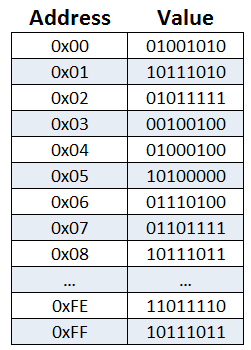

*   When creating variable n:


```c
#include <stdio.h>

int main(void)
{
    int n = 50;
    printf("%i\n", n);
}
```

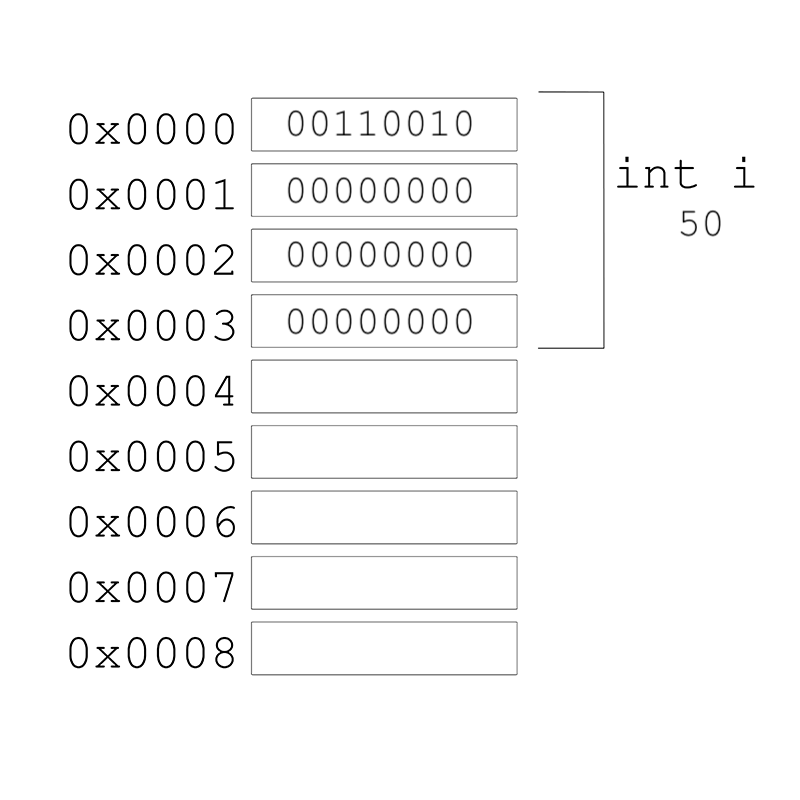

*   A pointer is a variable that stores an address in memory, where some other variable might be stored.
*   The & operator can be used to get the address of some variable, as with &n. And the * operator declares a variable as a pointer, as with int *p, indicating that we have a variable called p that points to an int. So, to store the address of a variable n into a pointer p, we would write.
*   With C, we can also go to specific addresses in memory, which might cause segmentation faults, where we’ve tried to read or write to memory we don’t have permission to.



```c
#include <stdio.h>

int main(void)
{
    int n = 50;
    int *p = &n;
    printf("%p\n", p);
    printf("%i\n", *p);
}
```



```shell
0x7ffe86df0bd4
50
```
*   In memory, we might have one variable, p, with the value of some address, like 0x123, stored, and another variable, an integer with the value 50, at that addresss:

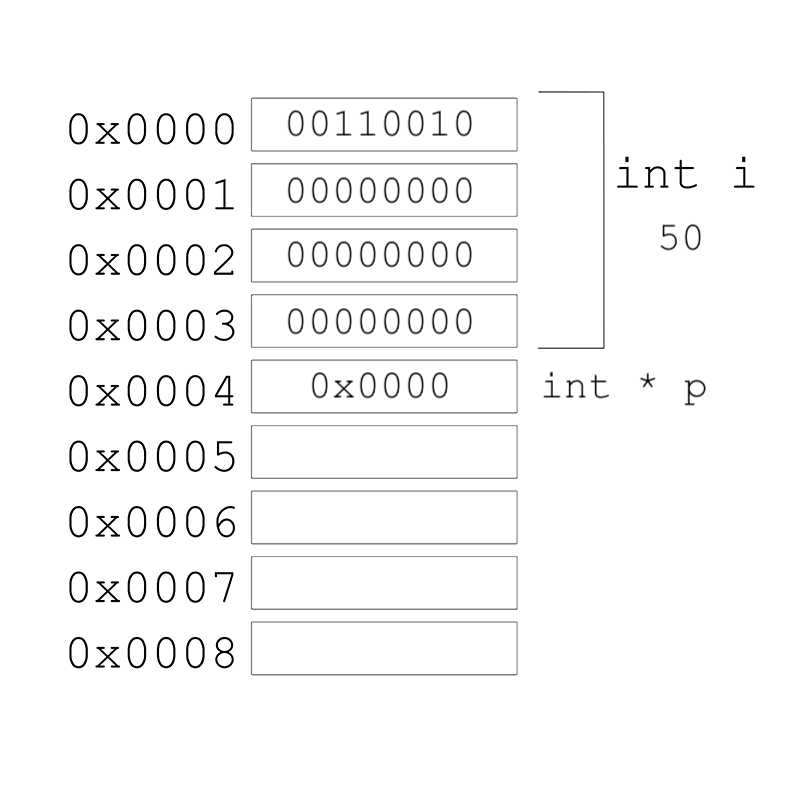

*   Notice that p takes up 8 bytes, since in modern computer systems, 64 bits are used in order to address the billions of bytes of memory available. With 32 bits, we can only count up to about 4 billion bytes, or about 4GB of memory.

run the below to see thehow many bits the machine uses to represent addresses:
``` shell
uname -a 
```

## Strings, Arrays



```c
#include <stdio.h>

int main(void)
{
    char *s = "HI!";
    printf("%p\n", s);
    printf("%p\n", &s[0]);
    printf("%p\n", &s[1]);
    printf("%p\n", &s[2]);
    printf("%p\n", &s[3]);
}
```

The address of each character in s

```shell
nova 45% gcc strings.c 
nova 46% ./a.out 
0x400644
0x400644
0x400645
0x400646
0x400647
```
The address of the first character, &s[0], is the same as the value of s. And each following character has an address that is one byte higher.


## Pointer arithmetic


```c
#include <stdio.h>

int main(void)
{
    char *s = "HI!";
    printf("%c\n", *s);
    printf("%c\n", *(s + 1));
    printf("%c\n", *(s + 2));
}
```
*s goes to the address stored in s, and *(s + 1) goes to the location in memory with the next character, an address that is one byte higher.


```c
#include <stdio.h>

int main(void)
{
    int numbers[] = {4, 6, 8, 2, 7, 5, 0};

    printf("%i\n", *numbers);
    printf("%i\n", *(numbers + 1));
    printf("%i\n", *(numbers + 2));
    printf("%i\n", *(numbers + 3));
    printf("%i\n", *(numbers + 4));
    printf("%i\n", *(numbers + 5));
    printf("%i\n", *(numbers + 6));
}
```
It turns out that we only need to add 1 to the address of numbers, instead of 4 (even though ints are 4 bytes in size), since the compiler already knows that the type of each value in numbers is 4 bytes. With + 1, we’re telling the compiler to move the next value in the array, not the next byte.


## Valgrind

*   We use **malloc** to allocate memory, and we use **free** to free the memory so the operating system can do something else with it.

*   Our computers might slow down if a program we’re running has a bug where it allocates more and more memory but never frees it. The operating system will take longer and longer to find enough available memory for our program.

Example:


```c
#include <stdio.h>
#include <stdlib.h>

int main(void)
{
    int *x = malloc(3 * sizeof(int));
    x[1] = 72;
    x[2] = 73;
    x[3] = 33;
}
```

Compile and run the program:
```shell
gcc memory.c 
./a.out 
```



*   We used malloc to allocate memory for 3 integers.
*   We’ve deliberately made a mistake where we forgot arrays are 0-indexed, and started at x[1] instead. Then, with x[3], we’re trying to access memory beyond the bounds of what we have access to.
*   We also don’t free the memory we’ve allocated.

*   When we compile and run our program, though, nothing seems to happen. It turns out that our mistake wasn’t bad enough to cause a segmentation fault this time, though it might next time.

We will use **valgrind**, a command-line tool that we can use to run our program and see if it has any memory-related issues.

How ?
run valgrind followed by the executable of the program as follow:


```shell
gcc -g memory.c
valgrind ./a.out 
```





```shell
==2141== Memcheck, a memory error detector
==2141== Copyright (C) 2002-2013, and GNU GPL'd, by Julian Seward et al.
==2141== Using Valgrind-3.10.0.SVN and LibVEX; rerun with -h for copyright info
==2141== Command: ./a.out
==2141== 
==2141== Invalid write of size 4
==2141==    at 0x400567: main (memory.c:9)
==2141==  Address 0x51fd04c is 0 bytes after a block of size 12 alloc'd
==2141==    at 0x4C2AB80: malloc (in /usr/lib/valgrind/vgpreload_memcheck-amd64-linux.so)
==2141==    by 0x40053E: main (memory.c:6)
==2141== 
==2141== 
==2141== HEAP SUMMARY:
==2141==     in use at exit: 12 bytes in 1 blocks
==2141==   total heap usage: 1 allocs, 0 frees, 12 bytes allocated
==2141== 
==2141== LEAK SUMMARY:
==2141==    definitely lost: 12 bytes in 1 blocks
==2141==    indirectly lost: 0 bytes in 0 blocks
==2141==      possibly lost: 0 bytes in 0 blocks
==2141==    still reachable: 0 bytes in 0 blocks
==2141==         suppressed: 0 bytes in 0 blocks
==2141== Rerun with --leak-check=full to see details of leaked memory
==2141== 
==2141== For counts of detected and suppressed errors, rerun with: -v
==2141== ERROR SUMMARY: 1 errors from 1 contexts (suppressed: 0 from 0)
```





*   We see some snippets like Invalid write of size 4 at ... memory.c:9, which gives us a hint to look at line 9, where we’re using x[3].
*   Another error telling us 12 bytes ... are definitely lost, in that we’ve allocated them, but not freed them.



Now fixing both errors

```c
#include <stdio.h>
#include <stdlib.h>

int main(void)
{
    int *x = malloc(3 * sizeof(int));
    x[0] = 72;
    x[1] = 73;
    x[2] = 33;
    free(x);
}
```


```shell
% gcc -g memory.c
% valgrind ./a.out
==2743== Memcheck, a memory error detector
==2743== Copyright (C) 2002-2013, and GNU GPL'd, by Julian Seward et al.
==2743== Using Valgrind-3.10.0.SVN and LibVEX; rerun with -h for copyright info
==2743== Command: ./a.out
==2743== 
==2743== 
==2743== HEAP SUMMARY:
==2743==     in use at exit: 0 bytes in 0 blocks
==2743==   total heap usage: 1 allocs, 1 frees, 12 bytes allocated
==2743== 
==2743== All heap blocks were freed -- no leaks are possible
==2743== 
==2743== For counts of detected and suppressed errors, rerun with: -v
==2743== ERROR SUMMARY: 0 errors from 0 contexts (suppressed: 0 from 0)
```

For more info see:


```shell
man valgrin
```
In order to view the leaks in details add the --leak-check=full option to valgrind, example:


```shell
% valgrind --leak-check=full ./a.out
==3052== Memcheck, a memory error detector
==3052== Copyright (C) 2002-2013, and GNU GPL'd, by Julian Seward et al.
==3052== Using Valgrind-3.10.0.SVN and LibVEX; rerun with -h for copyright info
==3052== Command: ./a.out
==3052== 
==3052== Invalid write of size 4
==3052==    at 0x400567: main (memory.c:9)
==3052==  Address 0x51fd04c is 0 bytes after a block of size 12 alloc'd
==3052==    at 0x4C2AB80: malloc (in /usr/lib/valgrind/vgpreload_memcheck-amd64-linux.so)
==3052==    by 0x40053E: main (memory.c:6)
==3052== 
==3052== 
==3052== HEAP SUMMARY:
==3052==     in use at exit: 12 bytes in 1 blocks
==3052==   total heap usage: 1 allocs, 0 frees, 12 bytes allocated
==3052== 
==3052== 12 bytes in 1 blocks are definitely lost in loss record 1 of 1
==3052==    at 0x4C2AB80: malloc (in /usr/lib/valgrind/vgpreload_memcheck-amd64-linux.so)
==3052==    by 0x40053E: main (memory.c:6)
==3052== 
==3052== LEAK SUMMARY:
==3052==    definitely lost: 12 bytes in 1 blocks
==3052==    indirectly lost: 0 bytes in 0 blocks
==3052==      possibly lost: 0 bytes in 0 blocks
==3052==    still reachable: 0 bytes in 0 blocks
==3052==         suppressed: 0 bytes in 0 blocks
==3052== 
==3052== For counts of detected and suppressed errors, rerun with: -v
==3052== ERROR SUMMARY: 2 errors from 2 contexts (suppressed: 0 from 0)
```





## Segmentation Fault

Popular error programmers encounter, when trying to read/write to memory that we don't have access to. 


```c
#include <stdio.h>

int main(void)
{
    int *p = NULL;
    *p = 51;
}
```

Can be tracked using valgrind.


# Command-line arguments


*   Programs of our own can also take in command-line arguments, or inputs given to our program in the command we use to run it.
*   We can change what our main function to no longer take in void, or no arguments, and instead:



```c
#include <stdio.h>

int main(int argc, char *argv[])
{
  ...
}
```
argc and argv are two variables that our main function will now get automatically when our program is run from the command line.

*argc*
Is the number of arguments provided to main when called from cmd.
*argv*
argument vector (or argument list), is an array of the arguments provided to main, the first argument, argv[0], is the name of our program.



```c
#include <stdio.h>
  
int main(int argc, char *argv[])
{
    printf("hello, %s\n", argv[0]);
}
```

We should make sure that we have the right number of arguments before we try to print something that isn’t there:



```c
#include <stdio.h>
  
int main(int argc, char *argv[])
{
    if (argc == 2)
    {
        printf("hello, %s\n", argv[1]);
    }
    else
    {
        printf("hello, world\n");
    }
}
```

Suppose we want to write a program that accepts two command line arguments and prints their sums:

## atoi

```c
#include <stdio.h>
#include <stdlib.h>

int main (int argc, char *argv[]) {
	int	a, b;

	if (argc != 3) {
		fprintf (stderr, "wrong number of arguments!\n");
		exit (1);
	}
	a = atoi (argv[1]);
	b = atoi (argv[2]);
	printf ("%i\n", a + b);
	exit (0);
}
```

The two calls to atoi convert the strings argv[1] and argv[2] to integers. atoi stands for "ASCII to integer."



What happen when the argument is not integer ?


# Read Data
Next lessons you will see how to read/write to files in C. 

Now, we will see and alternative way to working with files which you will use in your HW1.

Example Input

8.1402,-5.8022,-7.2376

10.1626,-7.4824,-6.5774

9.3153,-5.4974,-6.7025

9.7950,-5.2550,-9.1757

7.9095,-6.6488,-7.6088

The data we need to read is 2d matrix, if we know the size of it ahead of reading, this can be solved with instantiating a sta2d array.

But, what if we don't know the size before reading ?

Answer: dynamic memory allocation. 

How?
Answer: We will show an option with 2d linked list.

**This is just one option and is not mandatory, you can read the data in different ways.**



```c
#include <stdio.h>
#include <stdlib.h>

struct cord
{
    double value;
    struct cord *next;
};
struct vector
{
    struct vector *next;
    struct cord *cords;
};

int main(int argc, char **argv)
{

    struct vector *head_vec, *curr_vec, *next_vec;
    struct cord *head_cord, *curr_cord, *next_cord;
    int i, j, rows = 0, cols;
    double n;
    char c;

    head_cord = malloc(sizeof(struct cord));
    curr_cord = head_cord;
    curr_cord->next = NULL;

    head_vec = malloc(sizeof(struct vector));
    curr_vec = head_vec;
    curr_vec->next = NULL;


    while (scanf("%lf%c", &n, &c) == 2)
    {

        if (c == '\n')
        {
            curr_cord->value = n;
            curr_vec->cords = head_cord;
            curr_vec->next = malloc(sizeof(struct vector));
            curr_vec = curr_vec->next;
            curr_vec->next = NULL;
            head_cord = malloc(sizeof(struct cord));
            curr_cord = head_cord;
            curr_cord->next = NULL;
            continue;
        }

        curr_cord->value = n;
        curr_cord->next = malloc(sizeof(struct cord));
        curr_cord = curr_cord->next;
        curr_cord->next = NULL;
    }

    return 0;
}

```



# HW1

Kmeans Clustering. 

[Online Simulation](http://alekseynp.com/viz/k-means.html)

# Fun Topic



## Memory imprecision

In [ ]:
%%writefile imprecision.c
#include <stdio.h>

int main(void)
{
    float x = 1;
    float y = 10;

    printf("%.50f\n", x / y);
}

In [ ]:
!gcc imprecision.c -o imp

In [ ]:
!./imp

It turns out that this is called floating-point imprecision, where we don’t have enough bits to store all possible values. With a finite number of bits for a float, we can’t represent all possible real numbers (of which there are an infinite number of), so the computer has to store the closest value it can. And this can lead to problems where even small differences in value add up, unless the programmer uses some other way to represent decimal values as accurately as needed.

More detailed explanation in the below video.

In [ ]:
#@title
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wPBjd-vb9eI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')